In [8]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D
import numpy as np

In [9]:
X, Y = make_circles(n_samples = 500, noise = 0.02)

In [10]:
print(X.shape, Y.shape)

(500, 2) (500,)


In [15]:
plt.style.use('default')

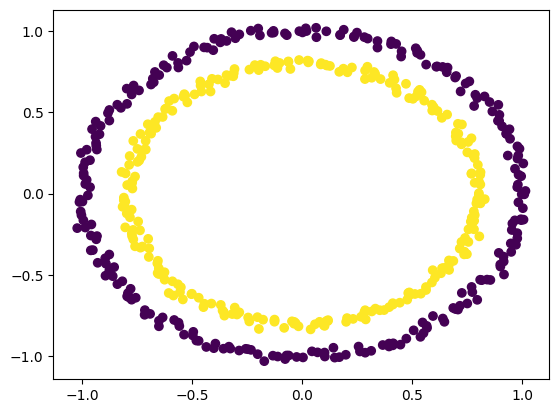

In [16]:
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

In [17]:
# NON-LINEAR TRANSFORMATION

In [18]:
def phi(X):
    X1 = X[:, 0]
    X2 = X[:, 1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0], 3))
    X_[:, :-1] = X
    X_[:, -1] = X3
    
    return X_

In [19]:
X_ = phi(X)
print(X_[:3, :])

[[ 0.89912374 -0.43747883  0.99981122]
 [-0.29648445 -0.74516057  0.6431673 ]
 [-0.10292717  0.80389635  0.65684334]]


In [28]:
def plot3D(X, show = True):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection = '3d')
    
    X1 = X[:, 0]
    X2 = X[:, 1]
    X3 = X[:, 2]
    
    ax.scatter(X1, X2, X3, zdir = 'z', c = Y, s = 20, depthshade = True)
    if show == True:
        plt.show()
        
    return ax

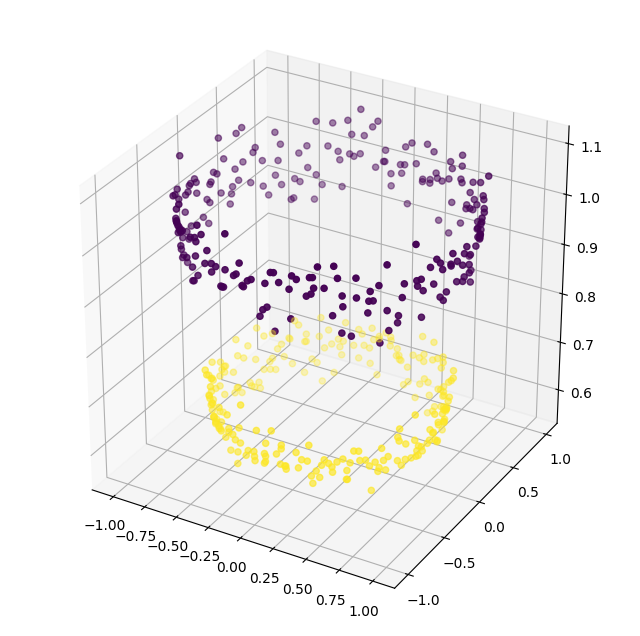

In [29]:
ax = plot3D(X_)

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
# LOGISTIC CLASSIFIER

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [45]:
lr = LogisticRegression()

In [46]:
# LOWER DIMENSIONAL SPACE

In [47]:
acc = cross_val_score(lr, X, Y, cv = 5).mean()
print(acc * 100)

46.8


In [48]:
# HIGHER DIMENSIONAL SPACE 

In [49]:
acc = cross_val_score(lr, X_, Y, cv = 5).mean()
print(acc * 100)

100.0


In [50]:
lr.fit(X_, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
wts = lr.coef_
print(wts)

[[-1.04170802e-03 -3.38776231e-02 -8.87646876e+00]]


In [52]:
bias = lr.intercept_
print(bias)

[7.18255702]


In [53]:
xx, yy = np.meshgrid(range(-2, 2), range(-2, 2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [54]:
z = -(wts[0, 0] * xx + wts[0, 1] * yy + bias)/wts[0, 2]
print(z)

[[0.81703613 0.81691877 0.81680142 0.81668406]
 [0.81321956 0.81310221 0.81298485 0.8128675 ]
 [0.809403   0.80928564 0.80916829 0.80905093]
 [0.80558643 0.80546908 0.80535172 0.80523437]]


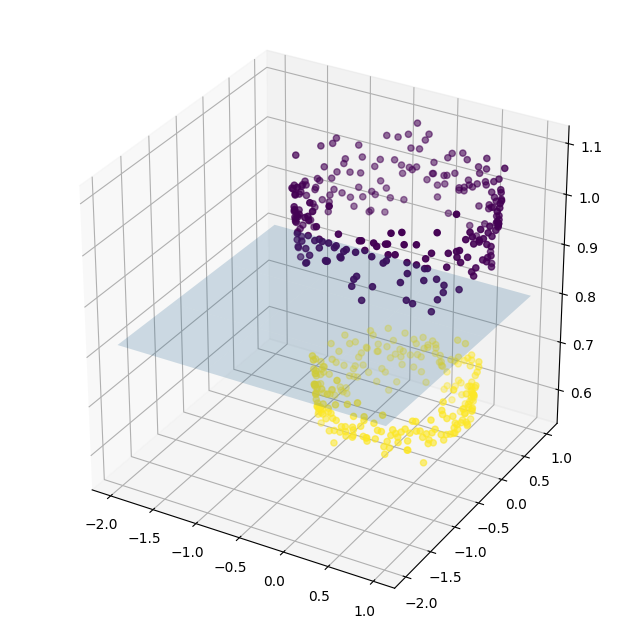

In [56]:
ax = plot3D(X_, show = False)
ax.plot_surface(xx, yy, z, alpha = 0.2)
plt.show()

In [57]:
# NON-LINEAR SVM

In [58]:
from sklearn import svm

In [59]:
# LINEAR KERNEL SVM

In [61]:
svc = svm.SVC(kernel = 'linear')
svc.fit(X, Y)
svc.score(X, Y)

0.5

In [62]:
# RBF KERNEL SVM

In [63]:
svc = svm.SVC(kernel = 'rbf')
svc.fit(X, Y)
svc.score(X, Y)

1.0

In [64]:
# POLYNOMIAL SVM

In [65]:
svc = svm.SVC(kernel = 'poly')
svc.fit(X, Y)
svc.score(X, Y)

0.548

In [66]:
# CUSTOM KERNEL

In [68]:
def custom_kernel(x1, x2):
    return np.square(np.dot(x1, x2.T))

In [69]:
svc = svm.SVC(kernel = custom_kernel)
svc.fit(X, Y)
svc.score(X, Y)

1.0

In [71]:
## https://scikit-learn.org/stable/modules/svm.html